In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display all columns in the dataframe
pd.set_option("display.max_columns", None)

#Read csv file
df2 = pd.read_csv(r'C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
#Check the rows and columns of the dataset
df2.shape

(2375581, 25)

In [4]:
#Check the first 5 rows of the dataset
df2.head()

,invoice_no,date,week,month,store_no,name,city,zipcode,latitude,longitude,county_no,county,category,sub_category,vendor_no,vendor,item,pack,bottle_vol_ml,bottle_cost,bottle_retail,bottles_sold,sales,gross_profit,vol_sold_liters
0,16681900011,01-02-19,1,1,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
1,18211500001,03-19-19,12,3,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
2,18940000006,04-23-19,17,4,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
3,20214600005,06-25-19,26,6,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
4,21680700022,09-04-19,36,9,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8


In [5]:
# Descriptive analysis 

<AxesSubplot:title={'center':'Sales by Day of Week'}, xlabel='day'>

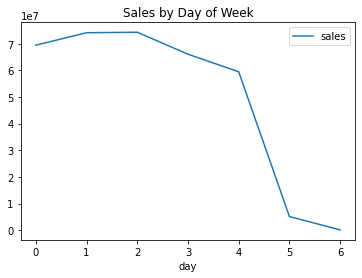

In [6]:
#Sales by day 

#Change datatype of date from object to datetime64
df2['date']=df2['date'].astype('datetime64')

#Get day of the week 
df2['day']=df2['date'].dt.dayofweek

#Plot the line graph in pandas 
#0 is Monday #6 is Sunday
sales_day=df2.groupby(by='day').aggregate({'sales':'sum'})
sales_day.plot(kind='line',title='Sales by Day of Week')


In [7]:
print('Store orders are very low on Saturday and zero on Sunday')

Store orders are very low on Saturday and zero on Sunday


<AxesSubplot:title={'center':'Sales by Week'}, xlabel='week'>

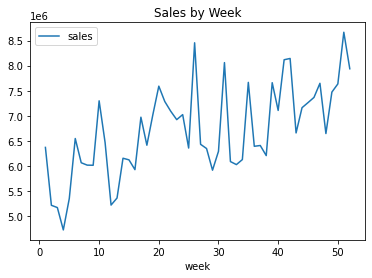

In [8]:
#Sales by week
#Pandas method
volume_week=df2.groupby(by=['week']).aggregate({'sales':'sum'}).sort_values(by='week',ascending=False)
volume_week.plot(kind='line',title= 'Sales by Week')

<AxesSubplot:title={'center':'Sales by Month'}, xlabel='month'>

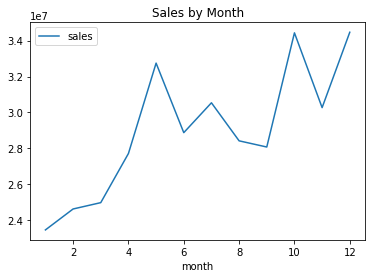

In [9]:
#Sales by month
#Pandas method
volume_month=df2.groupby(by=['month']).aggregate({'sales':'sum'}).sort_values(by='month',ascending=False)
volume_month.plot(kind='line',title='Sales by Month')

[Text(0.5, 0, 'Population')]

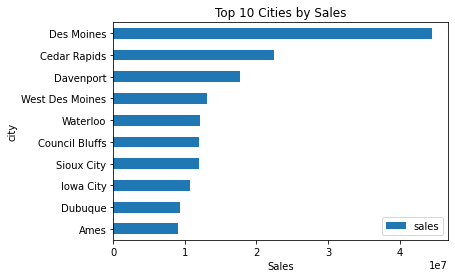

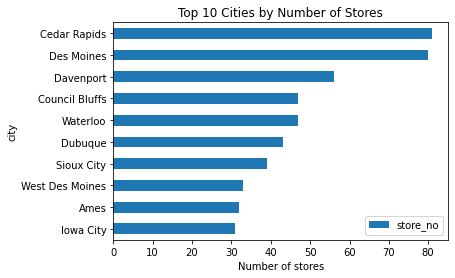

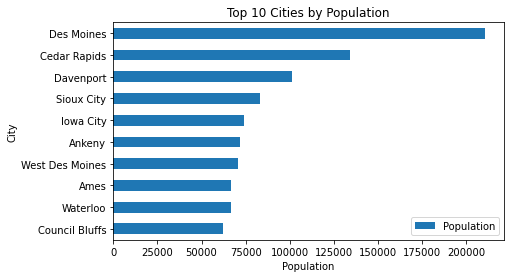

In [10]:
# Top 10 cities by sales
#Create a subset dataframe of city and sales
subset_cv=df2[['city','sales','store_no','county']]

#Group by cities and sum of sales 
city_sales=subset_cv.groupby(by=['city']).aggregate({'sales': 'sum'}).sort_values(by='sales',ascending=True)

#Plot bar chart
#Pandas
plot=city_sales.tail(10).plot(kind='barh',title='Top 10 Cities by Sales')
plot.set(xlabel='Sales')



#Number of stores by cities (Top 10) 
city_stores=df2.groupby(by=['city']).aggregate({'store_no': 'nunique'}).sort_values(by='store_no',ascending=True)

#Plot bar chart in pandas 
plot=city_stores.tail(10).plot(kind='barh',title='Top 10 Cities by Number of Stores')
plot.set(xlabel='Number of stores')


#Top 10 cities by population 
#Import population csv into dataframe
df_pop=pd.read_csv(r'C:\Users\BURROW\data_portfolio\Iowa_Alcohol_sales\data\raw\city_population.csv')

#Change columns name
df_pop.rename(columns={'name':'City','pop2021':'Population'},inplace=True)

#Get top 10 populated cities
topten_pop=df_pop.sort_values(by='Population',ascending=True)

#Plot the bar chart using pandas
plot=topten_pop.tail(10).plot(kind='barh',title='Top 10 Cities by Population',x='City',figsize=(7,4))
plot.set(xlabel='Population')

In [11]:
print('Question: Why are these cities in the top 10 in terms of sales?')
print('Answer: Higher number of stores and population')

Question: Why are these cities in the top 10 in terms of sales?
Answer: Higher number of stores and population


In [12]:
print('Question: Why are there so many stores in Des Monies and Cedar Rapids?')
print('Answer: Des Monies and Cedar Rapids are the top 2 most populated cities in Iowa. Higher population will lead to higher sales')

Question: Why are there so many stores in Des Monies and Cedar Rapids?
Answer: Des Monies and Cedar Rapids are the top 2 most populated cities in Iowa. Higher population will lead to higher sales


[Text(0.5, 0, 'Population')]

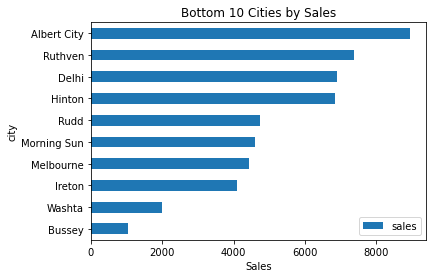

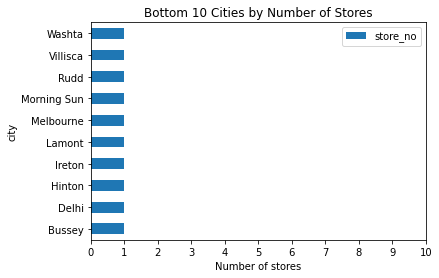

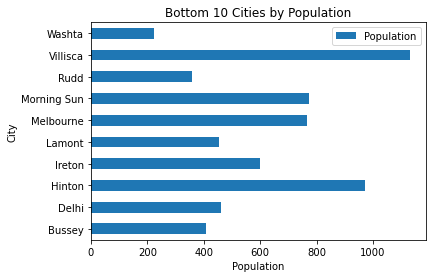

In [13]:
# Bottom 10 cities by sales

#Plot bar chart
#Pandas
plot=city_sales[:10].plot(kind='barh',title='Bottom 10 Cities by Sales')
plot.set(xlabel='Sales')


#Bottom 10 cities by number of stores
#Create subset of dataframe with city and store number columns
store_no_city=df2[['city','store_no']]

#Filter the cities to the bottom 10 cities with the volume sold
store_no_city2=store_no_city[store_no_city.city.isin(['Villisca','Lamont','Delhi','Hinton','Melbourne','Ireton','Rudd','Morning Sun','Washta','Bussey'])]

#Group by city and distinct count store_no
store_no_city3=store_no_city2.groupby(by='city').aggregate({'store_no':'nunique'}).sort_values(by='city',ascending=True)

#Plot graph in pandas 
plot=store_no_city3.plot(kind='barh',title='Bottom 10 Cities by Number of Stores',xticks=[0,1,2,3,4,5,6,7,8,9,10])
plot.set(xlabel='Number of stores')


#Bottom 10 cities by population
#Filter dataframe according to the bottom 10 cities
df_pop_bottom=df_pop[df_pop['City'].isin(['Villisca','Lamont','Delhi','Hinton','Melbourne','Ireton','Rudd','Morning Sun','Washta','Bussey'])].sort_values(by='City',ascending=True)

#Plot the graph in pandas 
plot=df_pop_bottom.plot(kind='barh',x='City',title='Bottom 10 Cities by Population')
plot.set(xlabel='Population')

In [14]:
print('Question: Why are these cities in the bottom 10 in terms of sales?')
print('Answer: Small number of stores and population')

Question: Why are these cities in the bottom 10 in terms of sales?
Answer: Small number of stores and population


In [15]:
print('Question: Why are there so few stores in these cities?')
print('Answer: These cities have population of less than 1200')

Question: Why are there so few stores in these cities?
Answer: These cities have population of less than 1200


[Text(0.5, 0, 'Number of stores in city')]

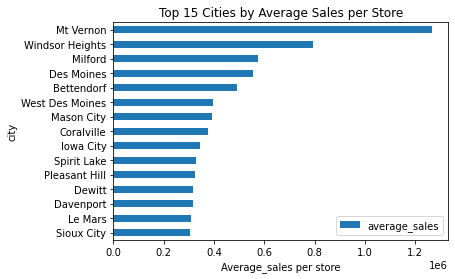

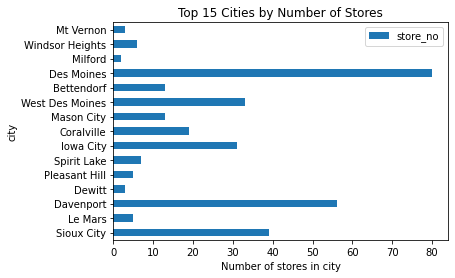

In [16]:
#Average sales for each store by city

#Group by cities , sum of stores and number of stores by city 
average_sales_city=subset_cv.groupby(by=['city']).aggregate({'sales': 'sum','store_no':'nunique'}).sort_values(by='sales',ascending=True)

#Create average sales column
average_sales_city['average_sales'] = average_sales_city['sales'] / average_sales_city['store_no']

#Sort the dataframe by average sales column 
average_sales_city=average_sales_city.sort_values(by='average_sales',ascending=True)

#Plot bar chart
#Pandas
plot=average_sales_city.tail(15).plot(kind='barh',y='average_sales',title='Top 15 Cities by Average Sales per Store')
plot.set(xlabel='Average_sales per store')


#Number of stores by top 15 city of average sales

#Plot bar chart
#Pandas
plot=average_sales_city.tail(15).plot(kind='barh',y='store_no',title='Top 15 Cities by Number of Stores')
plot.set(xlabel='Number of stores in city')


C:\Users\BURROW\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


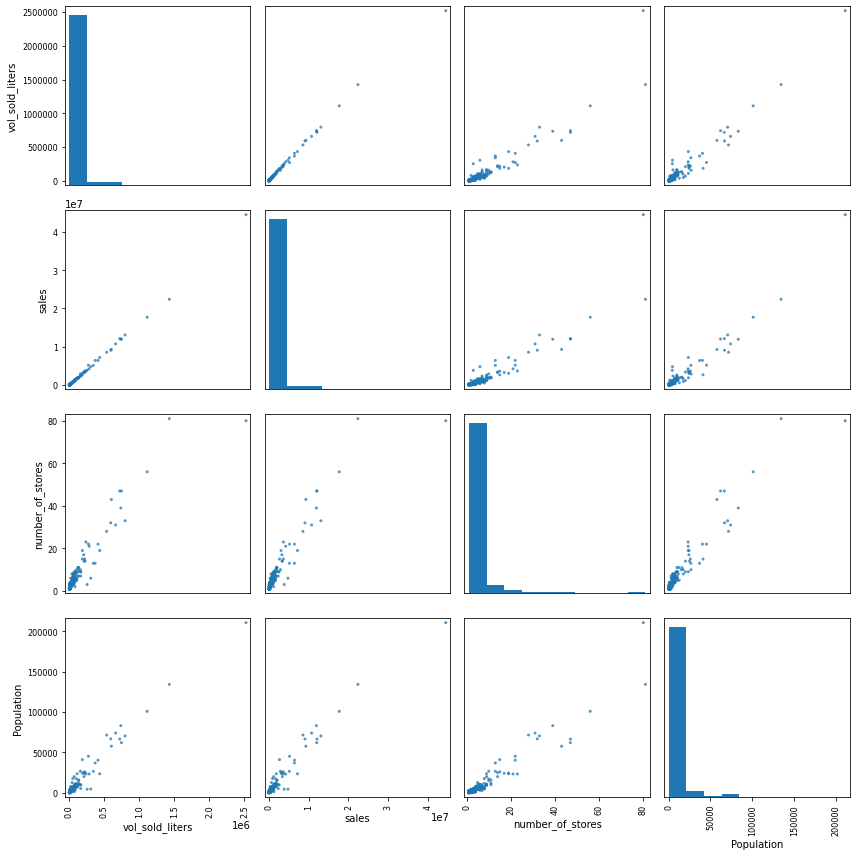

In [17]:
#Relationship between volume sold , population of city, number of stores in city

#Subset of Original dataframe 
relationship_df2=df2[['store_no','city','vol_sold_liters','sales']]

#Change column name from store_no to Number of stores
relationship_df2.rename(columns={'store_no':'number_of_stores'},inplace=True)

#Grouped by volume sold ,sales , number of stores
relationship_df3=relationship_df2.groupby(by='city').aggregate({'vol_sold_liters':'sum','sales':'sum','number_of_stores':'nunique'}).round(0)

#Merge the dataframe with population dataframe 
relationship_df4=relationship_df3.merge(right=df_pop,how='left',left_on='city',right_on='City')

#Scatter matrix using pandas
pd.plotting.scatter_matrix(relationship_df4,figsize=(12,12),alpha=0.75)

#Make the layout look good
plt.tight_layout()


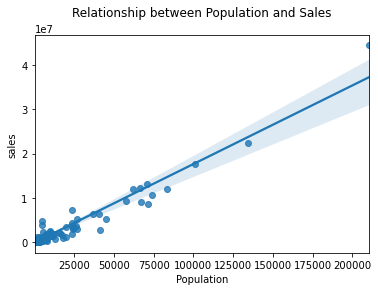

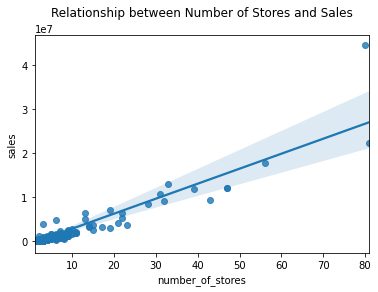

,vol_sold_liters,sales,number_of_stores,Population
vol_sold_liters,1.000000,0.998199,0.944409,0.977381
sales,0.998199,1.000000,0.929997,0.973815
number_of_stores,0.944409,0.929997,1.000000,0.957903
Population,0.977381,0.973815,0.957903,1.000000


In [18]:
#Relationship between population and sales
sns.regplot(x='Population',y='sales',data=relationship_df4)
plt.title('Relationship between Population and Sales',y=1.06)
plt.show()

#Relationship between number of stores and sales
sns.regplot(x='number_of_stores',y='sales',data=relationship_df4)
plt.title('Relationship between Number of Stores and Sales',y=1.06)
plt.show()

#Pearson coefficent of population and vol_sold_liters , number of stores , sales
relationship_df4.corr(method='pearson')

In [19]:
print('Insight: From the scatterplots, it seems like the number of stores, population,volume sold and sales are highly correlated to one another')

Insight: From the scatterplots, it seems like the number of stores, population,volume sold and sales are highly correlated to one another


<ipython-input-20-488e9f7a87ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_sales['percentage_sales'] =category_sales['sales']/category_sales['sales'].sum() * 100


<AxesSubplot:title={'center':'Percentage of Sales by Sub Category'}>

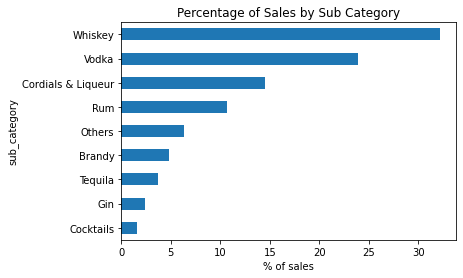

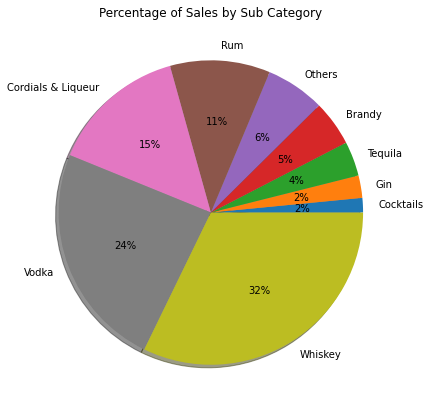

In [20]:
#Create a subset dataframe from the original dataframe 
category_sales=df2[['sales','sub_category']]

#Create a new column for percentage of sales
category_sales['percentage_sales'] =category_sales['sales']/category_sales['sales'].sum() * 100

#Group the sub_category and sum of sales
category_sales2=category_sales.groupby(by='sub_category').aggregate({'sales':'sum','percentage_sales':'sum'}).sort_values(by='sales',ascending=True)

#Plot the bar charts for percentage of sales by sub category 
#Pandas
plot=category_sales2.plot(y='percentage_sales',kind='barh',title='Percentage of Sales by Sub Category',legend='')
plot.set(xlabel='% of sales')

#Plot the pie chart
category_sales2.plot(y='percentage_sales',kind='pie',title='Percentage of Sales by Sub Category',legend='',ylabel='',autopct='%1.0f%%',shadow=True,figsize=[7,7])

In [21]:
print('Question: What is the percentage of sub_category to stock up in an alcohol store')
print('Vodka is 30% , Whiskey is 30% , Rum is 10% , Cordials & Liqueur is 10% , Everythin else is 20%')

Question: What is the percentage of sub_category to stock up in an alcohol store
Vodka is 30% , Whiskey is 30% , Rum is 10% , Cordials & Liqueur is 10% , Everythin else is 20%


<ipython-input-22-af72d50e0a35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_sales['percentage_sales']=vendor_sales['sales'] / vendor_sales['sales'].sum() * 100


[Text(0.5, 0, '% of Sales')]

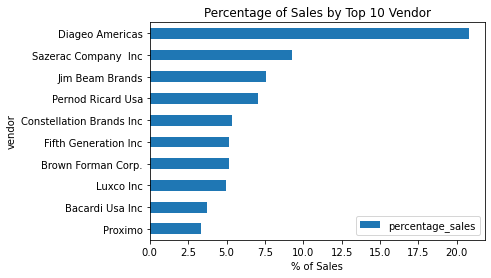

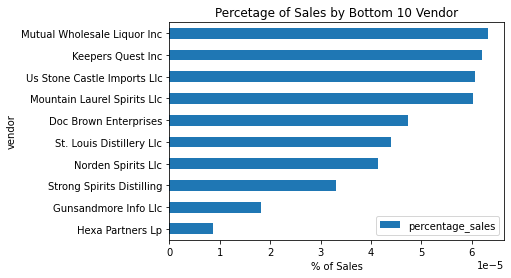

In [22]:
#Create a sub dataframe from original dataframe
vendor_sales=df2[['sales','vendor']]

#Create a new percentage of sales column
vendor_sales['percentage_sales']=vendor_sales['sales'] / vendor_sales['sales'].sum() * 100

#Perecntage of sales by top 10 vendor
vendor_sales2=vendor_sales.groupby(by=['vendor']).aggregate({'percentage_sales': 'sum'}).sort_values(by='percentage_sales',ascending=True)

#Plot bar chart in pandas
plot=vendor_sales2.tail(10).plot(kind='barh',title='Percentage of Sales by Top 10 Vendor')
plot.set(xlabel='% of Sales')

#Perecntage of sales by bottom 10 vendor
#Plot bar chart in pandas
plot=vendor_sales2[:10].plot(kind='barh',title='Percetage of Sales by Bottom 10 Vendor')
plot.set(xlabel='% of Sales')

In [23]:
print('Question: Why are these vendors in the top 10 or bottom 10?')
print('Answer: The brands in the top 10 are more well-known compared to the brands in the bottom 10.')

Question: Why are these vendors in the top 10 or bottom 10?
Answer: The brands in the top 10 are more well-known compared to the brands in the bottom 10.


In [24]:
#Create subset of dataset from sales and item
item_sales=df2[['item','category','sub_category','bottle_vol_ml','sales']]

#Filter the dataframe by sub_categories
brandy_item=item_sales[(item_sales['sub_category'] == 'Brandy')]
cliqueur_item=item_sales[item_sales['sub_category'] == 'Cordials & Liqueur']
cocktails_item=item_sales[item_sales['sub_category'] == 'Cocktails']
gin_item=item_sales[item_sales['sub_category'] == 'Gin']
other_item=item_sales[item_sales['sub_category'] == 'Others']
rum_item=item_sales[item_sales['sub_category'] == 'Rum']
tequila_item=item_sales[item_sales['sub_category'] == 'Tequila']
vodka_item=item_sales[item_sales['sub_category'] == 'Vodka']
whiskey_item=item_sales[item_sales['sub_category'] == 'Whiskey']

#Group the item and sales
grouped_brandy_item = brandy_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_cliqueur_item = cliqueur_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_cocktails_item = cocktails_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_gin_item = gin_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_other_item = other_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_rum_item = rum_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_tequila_item = tequila_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_vodka_item = vodka_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)
grouped_whiskey_item = whiskey_item.groupby(by=['item','category','sub_category','bottle_vol_ml']).aggregate({'sales': 'sum'}).round(0).sort_values(by='sales',ascending=False)


[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

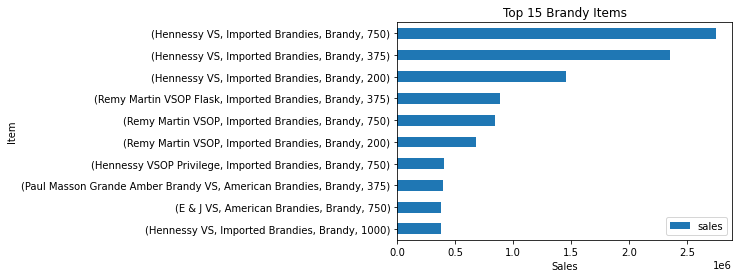

In [55]:
#Top 15 Brandy items
#Plot
plot=grouped_brandy_item[:10].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Brandy Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

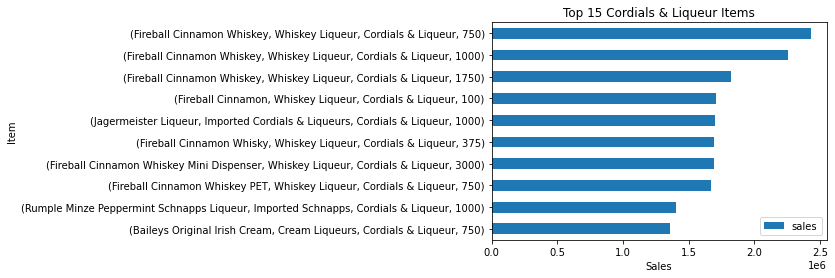

In [54]:
#Top 15 Cordials & Liqueur items
plot=grouped_cliqueur_item[:10].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Cordials & Liqueur Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

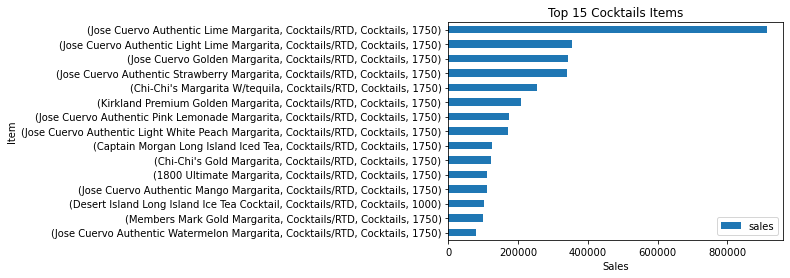

In [53]:
#Top 15 Cocktails items
plot=grouped_cocktails_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Cocktails Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

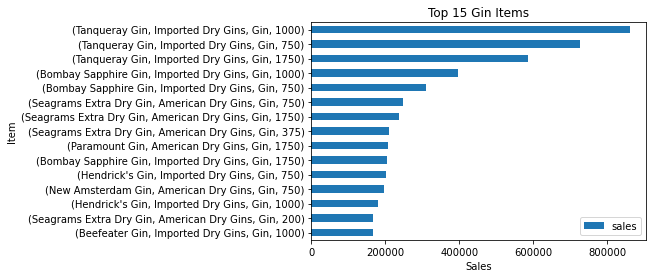

In [49]:
#Top 15 Gin items
plot=grouped_gin_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Gin Items') 
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

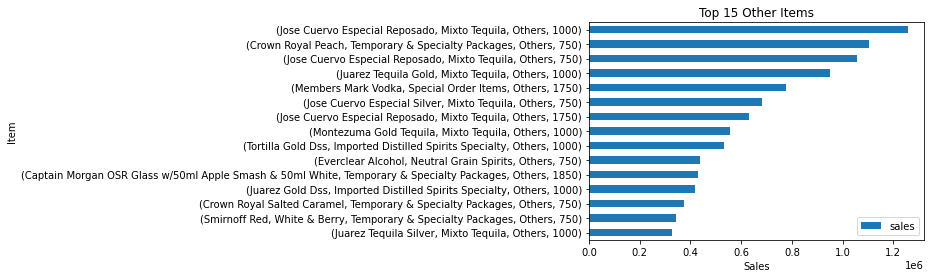

In [48]:
#Top 15 Other items
plot=grouped_other_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Other Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

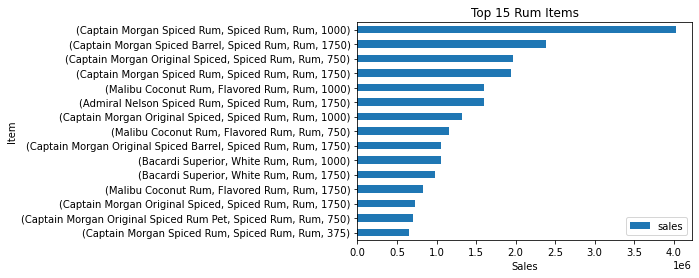

In [52]:
#Top 15 Rum items
plot=grouped_rum_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Rum Items') 
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

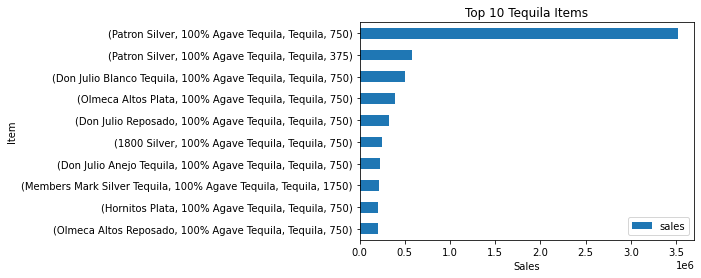

In [31]:
#Top 15 Tequila items
plot=grouped_tequila_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Tequila Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

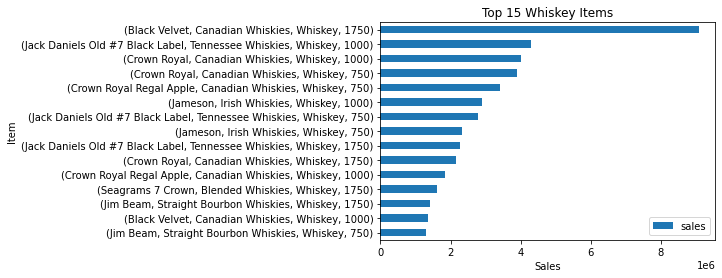

In [51]:
#Top 15 Whiskey items
plot=grouped_whiskey_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Whiskey Items')
plot.set(xlabel='Sales',ylabel='Item')

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'Item')]

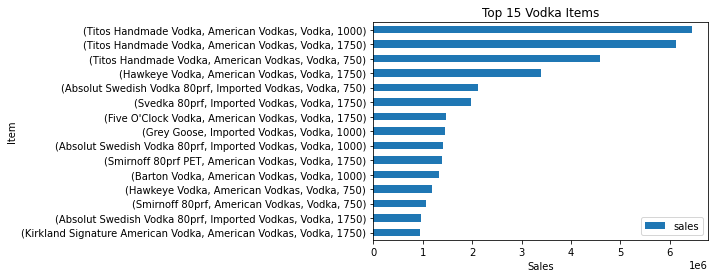

In [50]:
#Top 15 Vodka items
plot=grouped_vodka_item[:15].sort_values(by='sales',ascending=True).plot(kind='barh',title='Top 15 Vodka Items') 
plot.set(xlabel='Sales',ylabel='Item')

### Summary
__Location__  <br>
I recommend Mt Vernon, Windsor Heights and Milford due to low competition and top 3 averages sales per city

__Vendor__ <br>
I recommend getting well-known brand names instead of obsure brand names as it will have more sales 

__Category__ <br>
I recommend the breakdown allocation of category for inventory below
-  30% Whiskey
-  30% Vodka
-  10% Rum
-  10% Cordials & Liqueur
-  20% Everything else

__Items__ <br>
I recommend getting the top 3 brands of all volume types. <br>

__Brandy__
-  Hennessys VS
-  Remy Martin VSOP
-  Paul Masson Grande Amber Brandy

__Cordials & Liqueur__
-  Fireball Cinnamon Whiskey
-  Jagermeister 
-  Rumple Minz Peppermint Schnapps

__Cocktails__
-  Jose Cuervo Lime,Strawberry Magaritha
-  Chi-Chi Magaritha with tequila
-  Kirkland Golden Magaritha

__Gin__
-  Tanqueray Gin
-  Bombay Sapphire Gin
-  Seagrams Extra Dry Gin

__Others__
-  Jose Curevo Especial Reposado
-  Crown Royal Peach
-  Juarez Tequila Gold

__Rum__
-  Captain Morgan Spiced Rum
-  Malibu Coconut Rum
-  Admiral Nelson Spiced Rum

__Tequila__
-  Patron Silver
-  Don Julio Blanco Tequila
-  Olmeca Altos Plata

__Whiskey__
-  Black Velvet
-  Jack Daniels Old 7 Black Label
-  Crown Royal

__Vodka__
-  Titos Handmade Vodka
-  Hawkeye Vodka
-  Absolut Vodka

